# Notebook de análise da eficiência do indicador EMA 20/50/100/200

Este notebook tem como objetivo testar 2 coisas diferentes sendo mais especifico:
* O quão bem um investimento se sai usando o EMA, em relação a investir em um ativo e deixar ele evoluir sozinho
* Qual o melhor timing para se comprar e vender um ativo usando o EMA como referencia

Para fazer esse estudo eu usarei o TQQQ, que é basicamente o Nasdaq com um leverage de 3x. Essa escolha se deve pelo fato de que o grafico estrapolado facilitará a vizualização dos graficos e resultados, além de é claro esse ser um asset popular.

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

from modules import *

In [142]:
# Datagrame TQQQ dentro do periodo de 5 anos com intervalo diario
tqqq_df = get_ticker("TQQQ", periodo="1y" ,intervalo= "1h")

tqqq_ema = adicionar_ema(tqqq_df, [20, 50, 100, 200])

tqqq_df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2024-10-07 09:30:00-04:00,71.050003,71.510002,70.540001,71.500000,12376514,0.0,0.0,0.0
1,2024-10-07 10:30:00-04:00,71.500000,71.580002,70.861198,71.309998,5107036,0.0,0.0,0.0
2,2024-10-07 11:30:00-04:00,71.309998,71.449997,70.739998,71.230003,3352458,0.0,0.0,0.0
3,2024-10-07 12:30:00-04:00,71.225098,71.289001,70.849998,70.934998,2642353,0.0,0.0,0.0
4,2024-10-07 13:30:00-04:00,70.899902,71.219902,70.620003,70.730003,2838615,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1733,2025-10-06 11:30:00-04:00,106.779297,107.440002,106.733398,107.276001,4500018,0.0,0.0,0.0
1734,2025-10-06 12:30:00-04:00,107.279999,107.629997,107.029999,107.503799,3123959,0.0,0.0,0.0
1735,2025-10-06 13:30:00-04:00,107.518501,107.739998,107.345001,107.660004,3689760,0.0,0.0,0.0
1736,2025-10-06 14:30:00-04:00,107.669998,107.882401,107.453903,107.513802,3109414,0.0,0.0,0.0


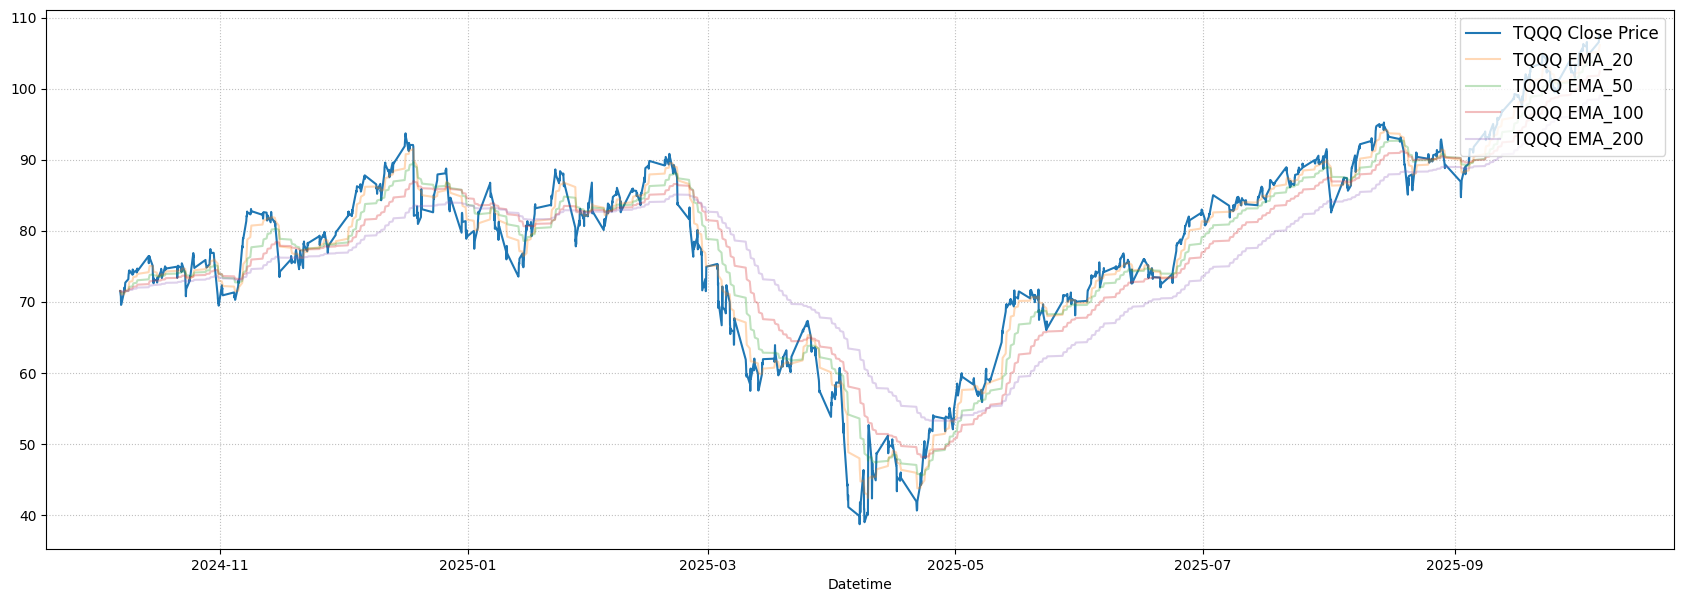

In [143]:
plt.figure(figsize=(21, 7))

plt.plot(tqqq_ema["Datetime"], tqqq_ema["Close"], label="TQQQ Close Price")
plt.plot(tqqq_ema["Datetime"], tqqq_ema["EMA_20"], label="TQQQ EMA_20", alpha=0.3)
plt.plot(tqqq_ema["Datetime"], tqqq_ema["EMA_50"], label="TQQQ EMA_50", alpha=0.3)
plt.plot(tqqq_ema["Datetime"], tqqq_ema["EMA_100"], label="TQQQ EMA_100", alpha=0.3)
plt.plot(tqqq_ema["Datetime"], tqqq_ema["EMA_200"], label="TQQQ EMA_200", alpha=0.3)

plt.xlabel("Datetime")
plt.grid(True, linestyle="dotted", alpha=0.8)
plt.legend(loc="upper right", fontsize=12)

plt.show()

In [144]:
tqqq_pctg = adicionar_pctg(tqqq_ema)

tqqq_pctg.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,EMA_20,EMA_50,EMA_100,EMA_200,Pctg_Variação
0,2024-10-07 09:30:00-04:00,71.050003,71.510002,70.540001,71.500000,12376514,0.0,0.0,0.0,71.500000,71.500000,71.500000,71.500000,0.000000
1,2024-10-07 10:30:00-04:00,71.500000,71.580002,70.861198,71.309998,5107036,0.0,0.0,0.0,71.481905,71.492549,71.496238,71.498109,-0.002657
2,2024-10-07 11:30:00-04:00,71.309998,71.449997,70.739998,71.230003,3352458,0.0,0.0,0.0,71.457914,71.482253,71.490966,71.495442,-0.001122
3,2024-10-07 12:30:00-04:00,71.225098,71.289001,70.849998,70.934998,2642353,0.0,0.0,0.0,71.408112,71.460792,71.479956,71.489865,-0.004142
4,2024-10-07 13:30:00-04:00,70.899902,71.219902,70.620003,70.730003,2838615,0.0,0.0,0.0,71.343531,71.432134,71.465106,71.482304,-0.002890


In [145]:
tqqq_invest = calc_investimento(tqqq_pctg, 71.5)

tqqq_invest.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,EMA_20,EMA_50,EMA_100,EMA_200,Pctg_Variação,Valor_Investimento
0,2024-10-07 09:30:00-04:00,71.050003,71.510002,70.540001,71.500000,12376514,0.0,0.0,0.0,71.500000,71.500000,71.500000,71.500000,0.000000,71.50
1,2024-10-07 10:30:00-04:00,71.500000,71.580002,70.861198,71.309998,5107036,0.0,0.0,0.0,71.481905,71.492549,71.496238,71.498109,-0.002657,71.31
2,2024-10-07 11:30:00-04:00,71.309998,71.449997,70.739998,71.230003,3352458,0.0,0.0,0.0,71.457914,71.482253,71.490966,71.495442,-0.001122,71.23
3,2024-10-07 12:30:00-04:00,71.225098,71.289001,70.849998,70.934998,2642353,0.0,0.0,0.0,71.408112,71.460792,71.479956,71.489865,-0.004142,70.93
4,2024-10-07 13:30:00-04:00,70.899902,71.219902,70.620003,70.730003,2838615,0.0,0.0,0.0,71.343531,71.432134,71.465106,71.482304,-0.002890,70.73


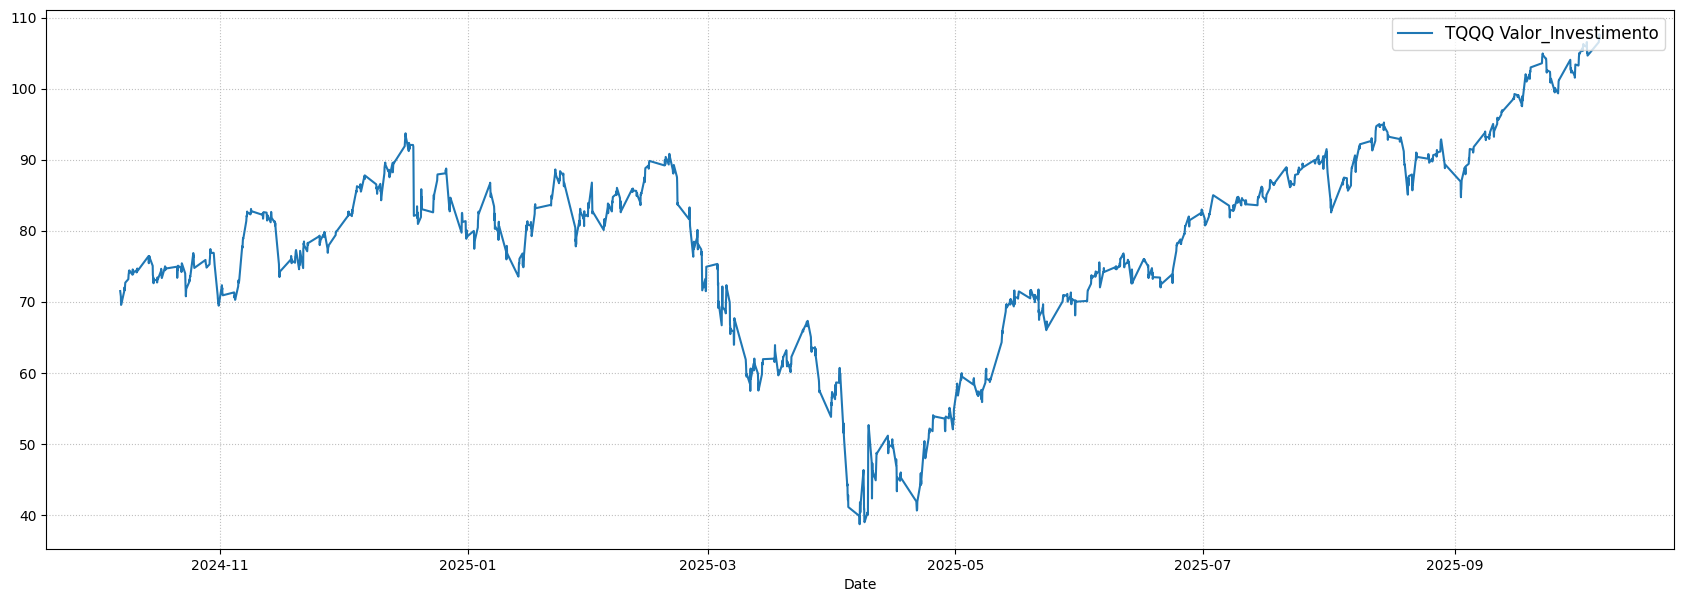

In [146]:
plt.figure(figsize=(21, 7))

plt.plot(tqqq_invest["Datetime"], tqqq_invest["Valor_Investimento"], label="TQQQ Valor_Investimento")

plt.xlabel("Date")
plt.grid(True, linestyle="dotted", alpha=0.8)
plt.legend(loc="upper right", fontsize=12)

plt.show()

In [147]:
tqqq_final = aplicar_estrategia(tqqq_invest, 71.5)

tqqq_final

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,EMA_20,EMA_50,EMA_100,EMA_200,Pctg_Variação,Valor_Investimento,Investimento_Estrategia
0,2024-10-07 09:30:00-04:00,71.050003,71.510002,70.540001,71.500000,12376514,0.0,0.0,0.0,71.500000,71.500000,71.500000,71.500000,0.000000,71.50,71.50
1,2024-10-07 10:30:00-04:00,71.500000,71.580002,70.861198,71.309998,5107036,0.0,0.0,0.0,71.481905,71.492549,71.496238,71.498109,-0.002657,71.31,71.50
2,2024-10-07 11:30:00-04:00,71.309998,71.449997,70.739998,71.230003,3352458,0.0,0.0,0.0,71.457914,71.482253,71.490966,71.495442,-0.001122,71.23,71.50
3,2024-10-07 12:30:00-04:00,71.225098,71.289001,70.849998,70.934998,2642353,0.0,0.0,0.0,71.408112,71.460792,71.479956,71.489865,-0.004142,70.93,71.50
4,2024-10-07 13:30:00-04:00,70.899902,71.219902,70.620003,70.730003,2838615,0.0,0.0,0.0,71.343531,71.432134,71.465106,71.482304,-0.002890,70.73,71.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,2025-10-06 11:30:00-04:00,106.779297,107.440002,106.733398,107.276001,4500018,0.0,0.0,0.0,105.489627,104.043742,102.026929,98.655847,0.004787,107.28,142.39
1734,2025-10-06 12:30:00-04:00,107.279999,107.629997,107.029999,107.503799,3123959,0.0,0.0,0.0,105.681453,104.179431,102.135382,98.743886,0.002123,107.50,142.69
1735,2025-10-06 13:30:00-04:00,107.518501,107.739998,107.345001,107.660004,3689760,0.0,0.0,0.0,105.869886,104.315924,102.244781,98.832604,0.001453,107.66,142.90
1736,2025-10-06 14:30:00-04:00,107.669998,107.882401,107.453903,107.513802,3109414,0.0,0.0,0.0,106.026450,104.441331,102.349118,98.918984,-0.001358,107.51,142.71


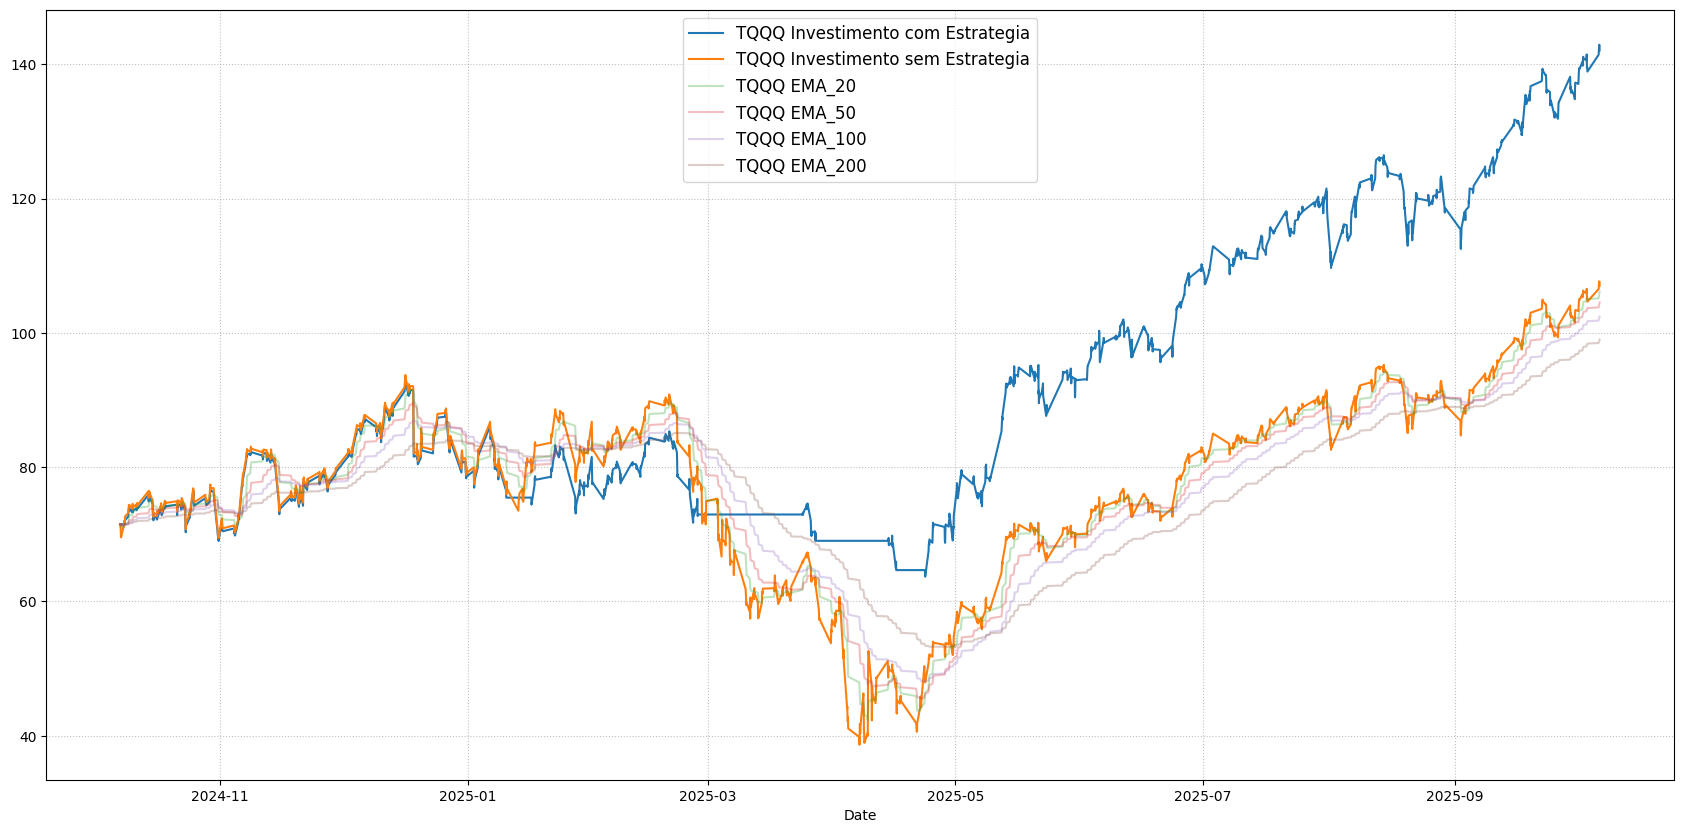

In [149]:
plt.figure(figsize=(21, 10))

plt.plot(tqqq_final["Datetime"], tqqq_final["Investimento_Estrategia"], label="TQQQ Investimento com Estrategia")
plt.plot(tqqq_final["Datetime"], tqqq_final["Valor_Investimento"], label="TQQQ Investimento sem Estrategia")
plt.plot(tqqq_final["Datetime"], tqqq_final["EMA_20"], label="TQQQ EMA_20", alpha=0.3)
plt.plot(tqqq_final["Datetime"], tqqq_final["EMA_50"], label="TQQQ EMA_50", alpha=0.3)
plt.plot(tqqq_final["Datetime"], tqqq_final["EMA_100"], label="TQQQ EMA_100", alpha=0.3)
plt.plot(tqqq_final["Datetime"], tqqq_final["EMA_200"], label="TQQQ EMA_200", alpha=0.3)

plt.xlabel("Date")
plt.grid(True, linestyle="dotted", alpha=0.8)
plt.legend(loc="upper center", fontsize=12)

plt.show()